In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
train = torchvision.datasets.FashionMNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.FashionMNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True, num_workers=2)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False, num_workers=2)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [5]:
X, y = data[0][0], data[1][0]

In [6]:
print(data[1])

tensor([5, 9, 9, 9, 8, 1, 2, 4, 7, 9])


In [3]:
import matplotlib.pyplot as plt  # pip install matplotlib

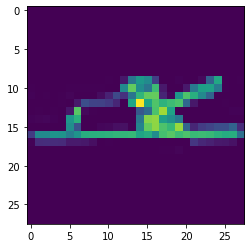

In [8]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [9]:
data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [10]:
data[0][0][0][3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [10]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [11]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 10.0%
1: 10.0%
2: 10.0%
3: 10.0%
4: 10.0%
5: 10.0%
6: 10.0%
7: 10.0%
8: 10.0%
9: 10.0%


In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


In [14]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [18]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.7146, grad_fn=<NllLossBackward>)
tensor(0.5592, grad_fn=<NllLossBackward>)
tensor(0.5490, grad_fn=<NllLossBackward>)


In [145]:
correct = 0
total = 0

incorr_X = []
incorr_y = []
incorr_argmax = []
incorr_yidx = []



with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            else:
                incorr_X.append(X)
                incorr_y.append(y)
                incorr_argmax.append(torch.argmax(i))
                incorr_yidx.append(y[idx])
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.865


In [89]:
total

10000

In [93]:
len(testset)

1000

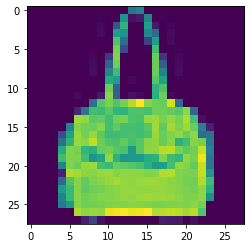

In [27]:
plt.imshow(X[2].view(28,28))
plt.show()

In [28]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(8)


In [37]:
print(output_label(int(torch.argmax(net(X[2].view(-1,784))[0]))))

Bag


In [8]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [22]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-33.4425, -47.2451, -35.2251, -40.7630, -44.2564,   0.0000, -34.0280,
        -20.7568, -37.3442, -20.3443], grad_fn=<SelectBackward>)


In [23]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(5)


In [33]:
checkpoint = {'model':  Net(),
              'state_dict': net.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'fcheckpoint_fmnist_3.pth')

/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [4]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    model.eval()
    
    return model

In [7]:
net = load_checkpoint('fcheckpoint_fmnist_3.pth')
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
# labels:  Pullover, Ankle Boot, Shirt, T-shirt/Top, Dress, Coat, Coat, Sandal, Coat, Bag, 

In [17]:
# demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(trainset))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Pullover, Sandal, Ankle Boot, Trouser, Pullover, Sandal, Sandal, T-shirt/Top, Ankle Boot, Bag, 

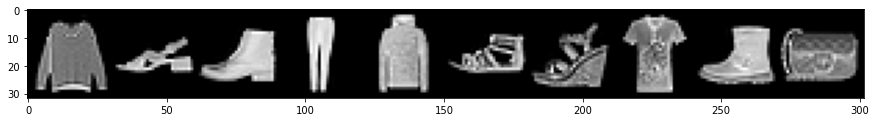

In [20]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt


grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

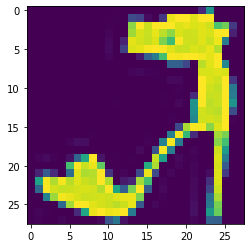

Sandal



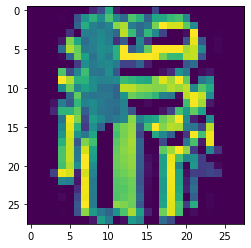

Shirt



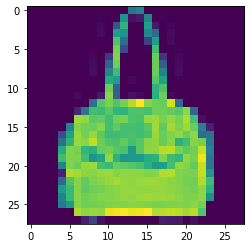

Bag



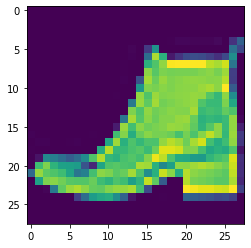

Ankle Boot



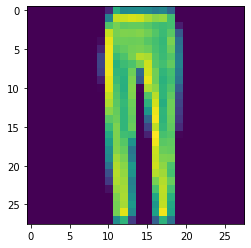

Trouser



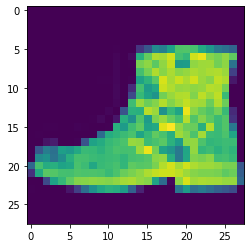

Ankle Boot



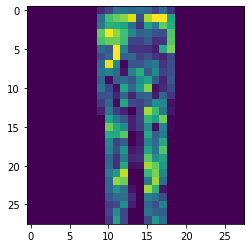

Trouser



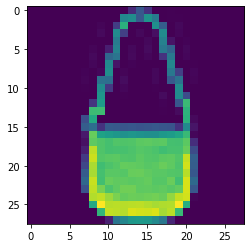

Bag



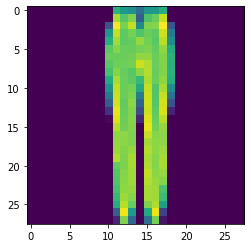

Trouser



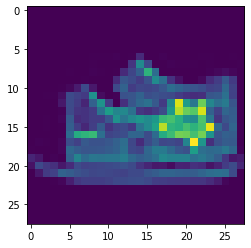

Sandal



In [28]:
for i in range(100):
    plt.imshow(X[i].view(28,28))
    plt.show()
    print(output_label(int(torch.argmax(net(X[i].view(-1,784))[0]))))
    print()

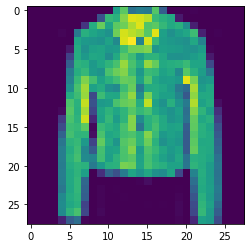

Coat



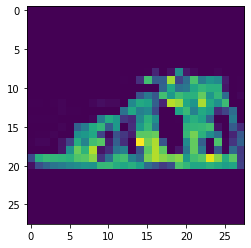

Coat



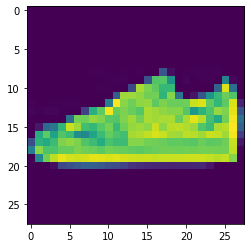

Pullover



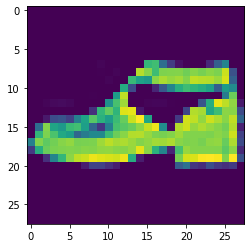

Pullover



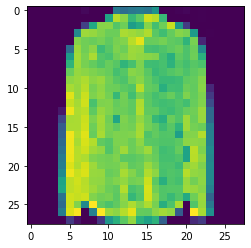

Shirt



In [29]:
for i in range(5):
    plt.imshow(incorr_X[i][i].view(28,28))
#     plt.imshow(incorr_X[i].view(28,28))
    plt.show()
    print(output_label(int(torch.argmax(net(incorr_X[i].view(-1,784))[0]))))
    print()

In [47]:
incorr_X[0]

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

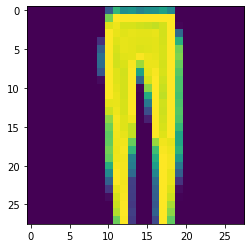

In [43]:
plt.imshow(incorr_X[5][1].view(28,28))
plt.show()

In [44]:
print(output_label(int(torch.argmax(net(incorr_X[5][1].view(-1,784))[0]))))

Trouser


In [45]:
output_label(int(incorr_argmax[5]))

'Shirt'

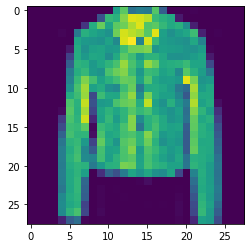

Coat
Sandal



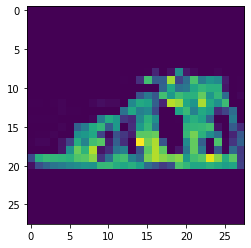

Sandal
Pullover



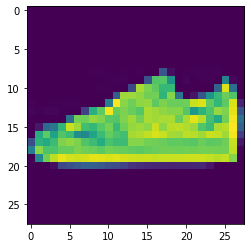

Sneaker
Sandal



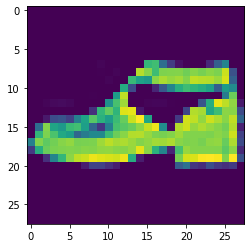

Sandal
Pullover



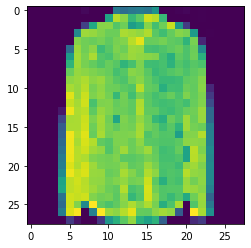

Shirt
T-shirt/Top



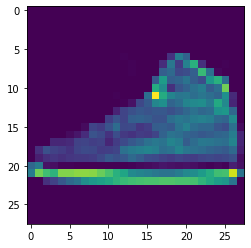

Sneaker
Shirt



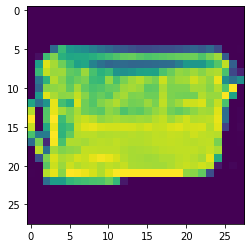

Bag
Shirt



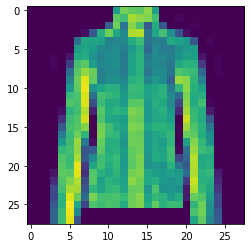

Coat
Pullover



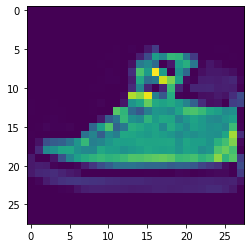

Sneaker
Dress



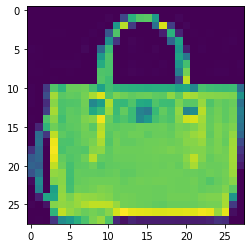

Bag
Coat



In [49]:
for i in range(10):
    plt.imshow(incorr_X[i][i].view(28,28))
    plt.show()
    print(output_label(int(torch.argmax(net(incorr_X[i][i].view(-1,784))[0]))))
    print(output_label(int(incorr_argmax[i])))
    print()

In [75]:
print(output_label(int(incorr_yidx[5])))

Pullover


In [76]:
print(output_label(int(incorr_argmax[5])))

Shirt


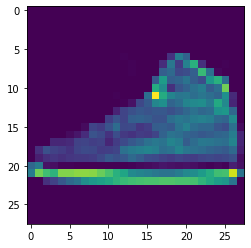

In [77]:
plt.imshow(incorr_X[5][5].view(28,28))
plt.show()

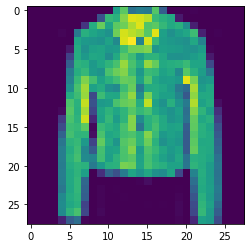

In [81]:
plt.imshow(incorr_X[0][0].view(28,28))

In [84]:
torch.argmax(incorr_y[0])

tensor(8)

In [85]:
incorr_argmax[0]

tensor(5)

In [86]:
incorr_yidx[0]

tensor(7)

In [33]:
# i, d = incorr_X

Ankle Boot
Ankle Boot
0
Pullover
Pullover
1
Accuracy:  1.0
Correct: 2


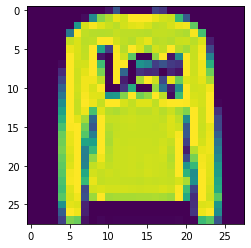

In [144]:
correct = 0
total = 0

incorr_X = []
incorr_y = []
incorr_argmax = []
incorr_yidx = []



with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        
#         plt.imshow(output)
        
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            
            plt.imshow(X[idx].view(28,28))
            
            print(output_label(int(torch.argmax(i))))
            print(output_label(int(y[idx])))
            print(total)
            
            if torch.argmax(i) == y[idx]:
                correct += 1
            else:
                incorr_X.append(X)
                incorr_y.append(y)
                incorr_argmax.append(torch.argmax(i))
                incorr_yidx.append(y[idx])
            total += 1
            
#             print(total>1)
            if total > 1:
                break
            
        if total > 1:
            break

print("Accuracy: ", round(correct/total, 3))
print('Correct: ' + str(correct))

In [96]:
total

1001

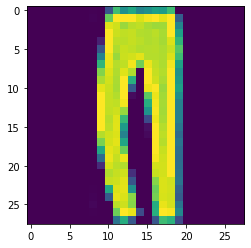

In [136]:
import matplotlib.pyplot as plt

plt.imshow(X[2].view(28,28))
plt.show()

In [137]:
print(output_label(torch.argmax(net(X[2].view(-1,784))[0])))

Trouser


In [139]:
a_featureset = X[2]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-9.4707e+00, -1.4638e-04, -1.8287e+01, -9.5821e+00, -1.6358e+01,
        -2.8168e+01, -1.5542e+01, -4.0227e+01, -2.0617e+01, -2.5852e+01])


In [140]:
biggest_index = torch.argmax(first_pred)
print(output_label(biggest_index))

Trouser


In [201]:
output_label(y[2])

'Bag'

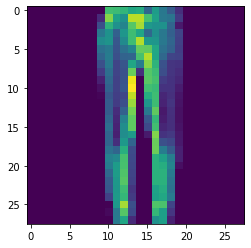

In [163]:
import matplotlib.pyplot as plt

plt.imshow(incorr_X[10][5].view(28,28))
plt.show()

In [164]:
a_featureset = incorr_X[10][5]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-8.2539e+00, -2.1290e-03, -1.2334e+01, -6.3242e+00, -9.9017e+00,
        -1.6345e+01, -1.0861e+01, -2.4648e+01, -1.5473e+01, -1.6122e+01])


In [165]:
biggest_index = torch.argmax(first_pred)
print(output_label(biggest_index))

Trouser


In [168]:
output_label(int(incorr_yidx[15]))

'Shirt'

In [169]:
len(incorr_yidx)

1353

In [170]:
incorr_X

1353

In [171]:
import numpy as np

np.array(incorr_yidx).shape

(1353,)

In [176]:
np.array(incorr_X[1]).shape

(10, 1, 28, 28)

In [34]:
# for i in range(10):
#     plt.imshow(incorr_X[i].view(28,28))
#     plt.show()

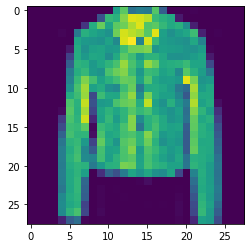

Coat
Sneaker


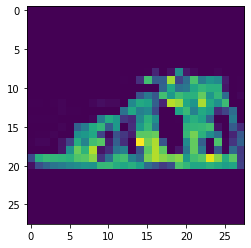

Sandal
Coat


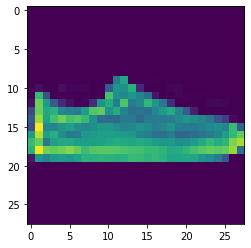

Sandal
Ankle Boot


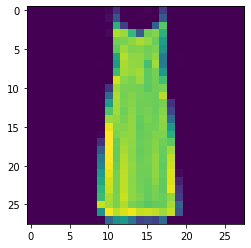

Dress
Coat


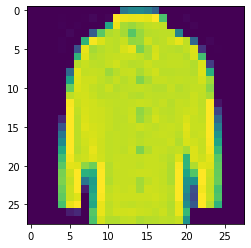

Coat
Dress


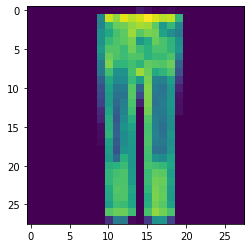

Trouser
Pullover


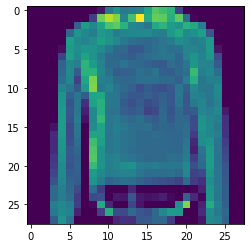

Pullover
Coat


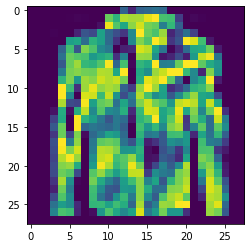

Pullover
Coat


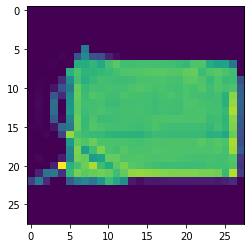

Bag
Pullover


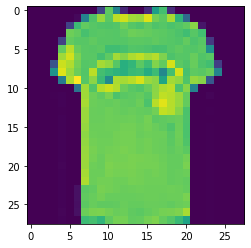

T-shirt/Top
Dress


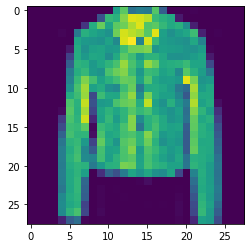

Coat
Coat


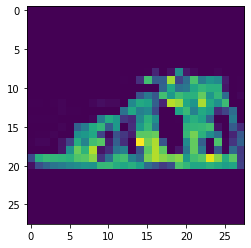

Sandal
Ankle Boot


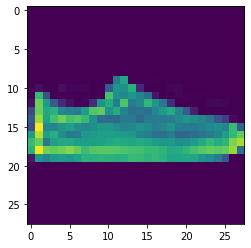

Sandal
Coat


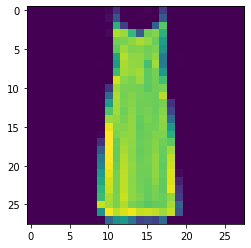

Dress
Dress


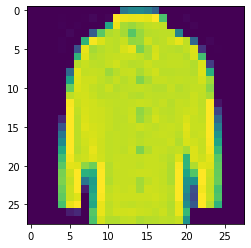

Coat
Pullover


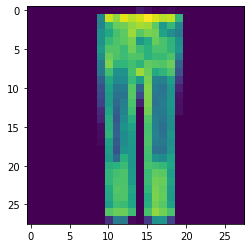

Trouser
Coat


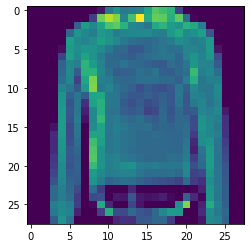

Pullover
Coat


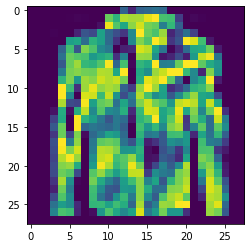

Pullover
Pullover


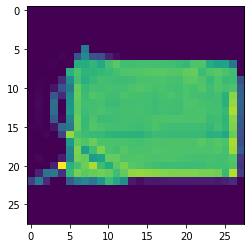

Bag
Dress


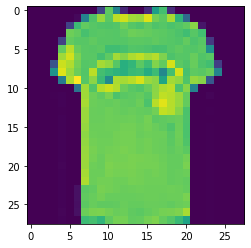

T-shirt/Top
Ankle Boot


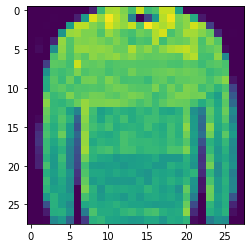

Pullover
Ankle Boot


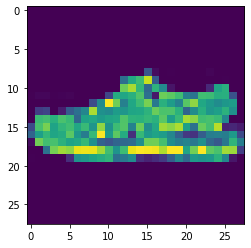

Sandal
Coat


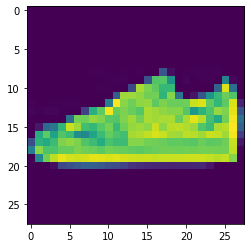

Sneaker
Dress


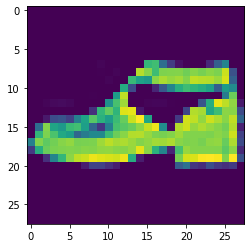

Sandal
Pullover


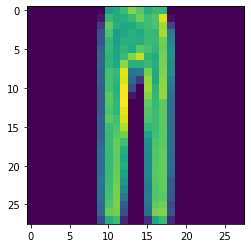

Trouser
Coat


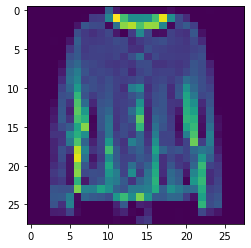

Pullover
Coat


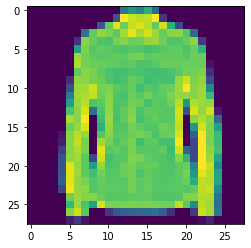

Shirt
Pullover


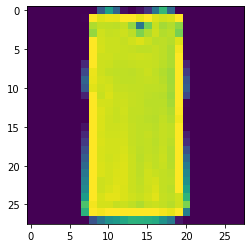

T-shirt/Top
Dress


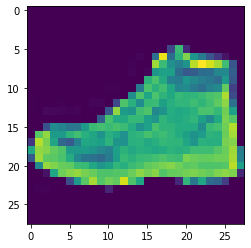

Ankle Boot
Ankle Boot


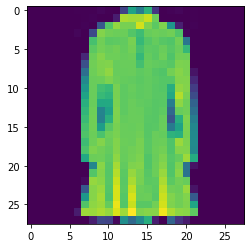

Dress
Shirt


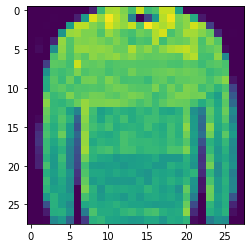

Pullover
Coat


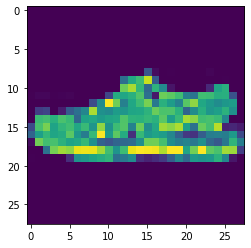

Sandal
Dress


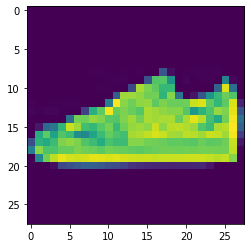

Sneaker
Pullover


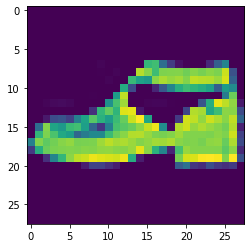

Sandal
Coat


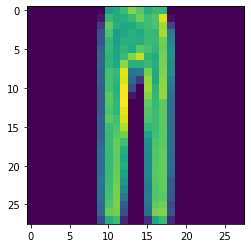

Trouser
Coat


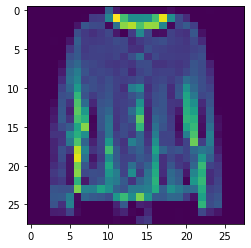

Pullover
Pullover


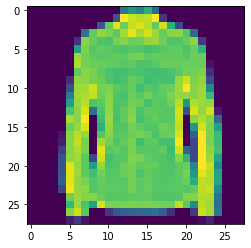

Shirt
Dress


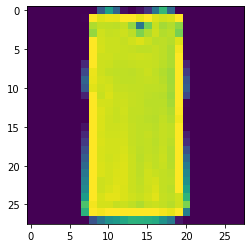

T-shirt/Top
Ankle Boot


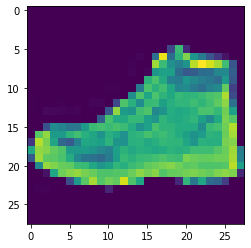

Ankle Boot
Shirt


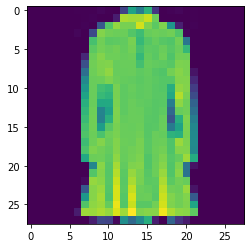

Dress
Coat


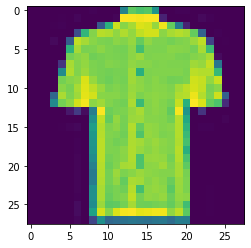

Shirt
Dress


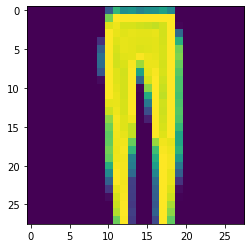

Trouser
Pullover


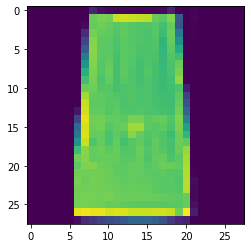

T-shirt/Top
Coat


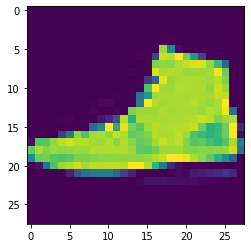

Sneaker
Coat


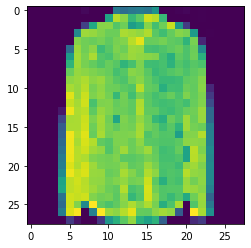

Shirt
Pullover


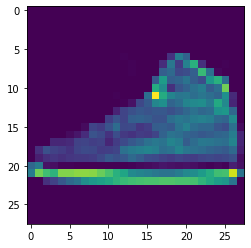

Sneaker
Dress


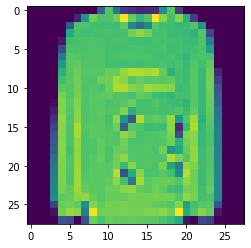

Pullover
Ankle Boot


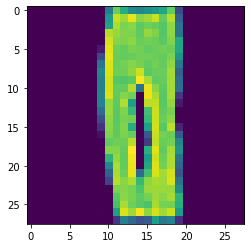

Trouser
Shirt


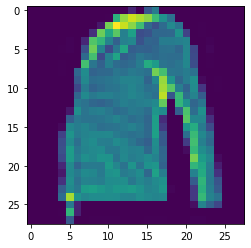

Pullover
Coat


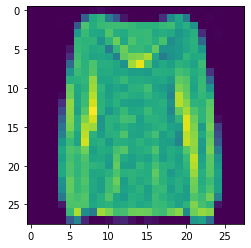

Shirt
Pullover


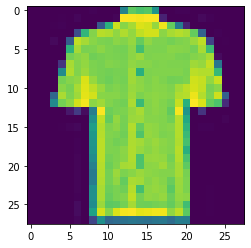

Shirt
Pullover


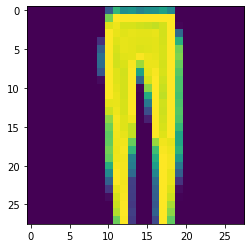

Trouser
Coat


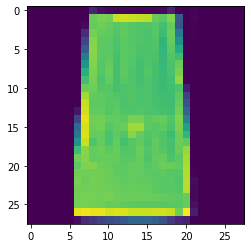

T-shirt/Top
Coat


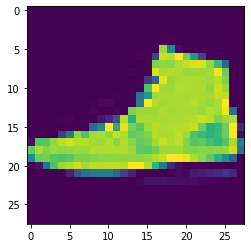

Sneaker
Pullover


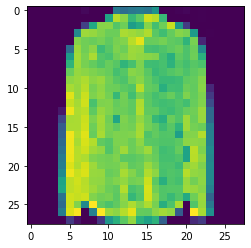

Shirt
Dress


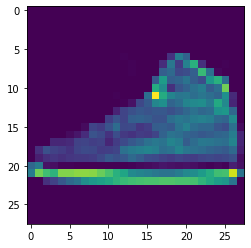

Sneaker
Ankle Boot


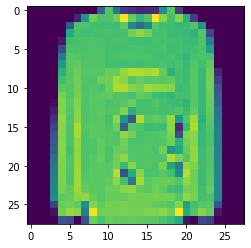

Pullover
Shirt


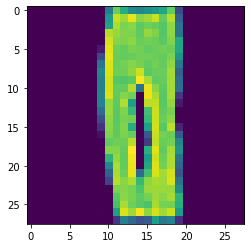

Trouser
Coat


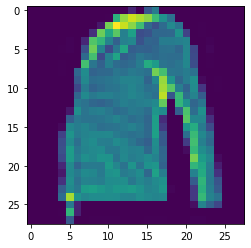

Pullover
Pullover


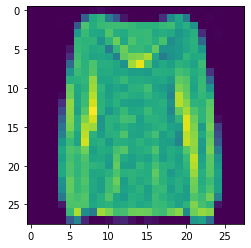

Shirt
Ankle Boot


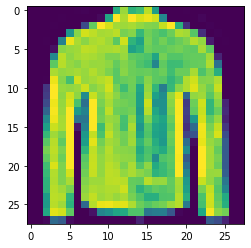

Shirt
Coat


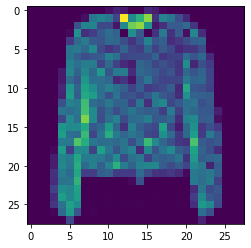

Pullover
Coat


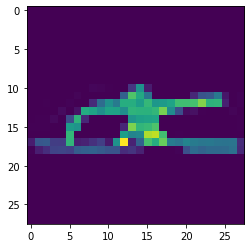

Sandal
Pullover


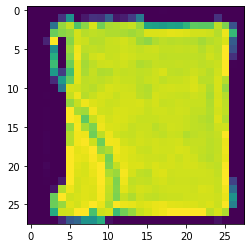

Bag
Dress


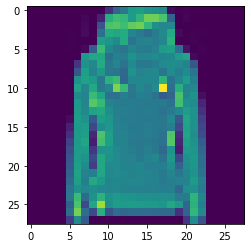

Pullover
Ankle Boot


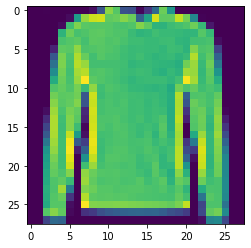

Pullover
Shirt


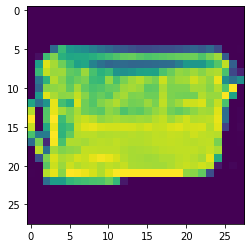

Bag
Coat


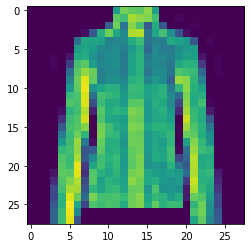

Coat
Pullover


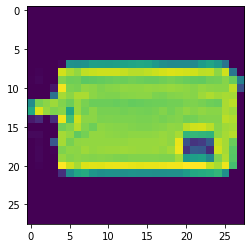

Bag
Ankle Boot


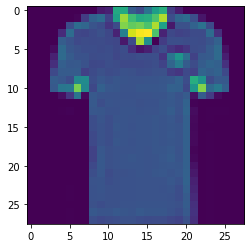

T-shirt/Top
Shirt


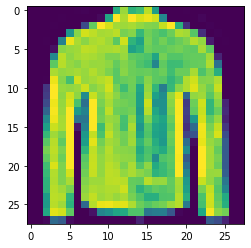

Shirt
Coat


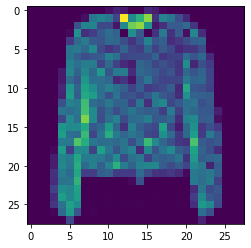

Pullover
Pullover


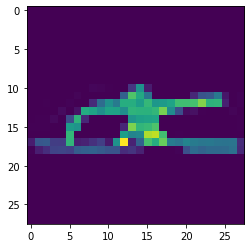

Sandal
Dress


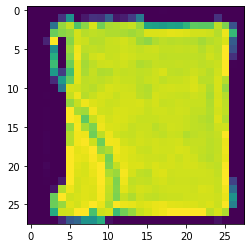

Bag
Ankle Boot


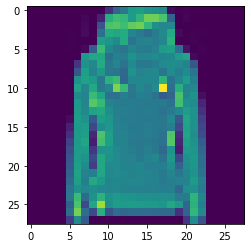

Pullover
Shirt


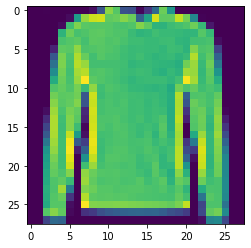

Pullover
Coat


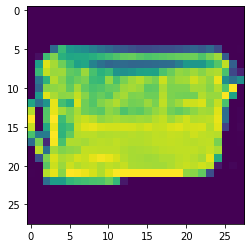

Bag
Pullover


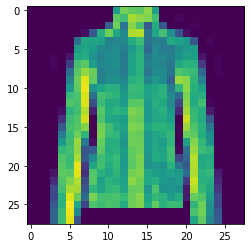

Coat
Ankle Boot


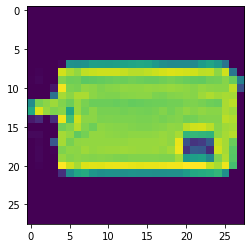

Bag
Shirt


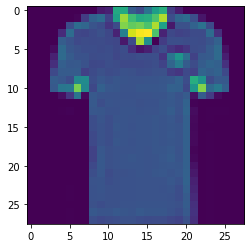

T-shirt/Top
Coat


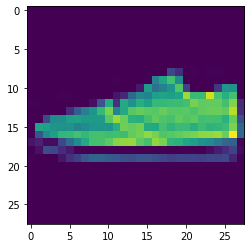

Sneaker
Pullover


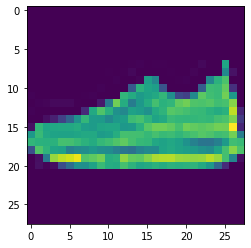

Sneaker
Dress


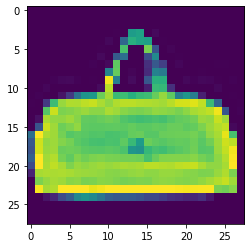

Bag
Ankle Boot


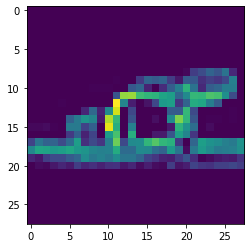

Sandal
Shirt


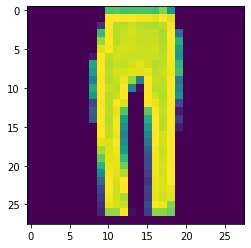

Trouser
Coat


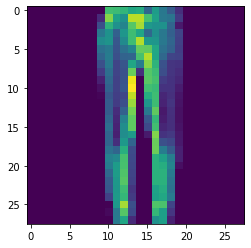

Trouser
Pullover


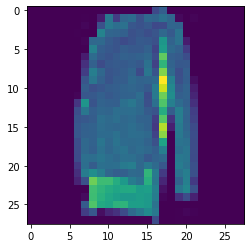

Dress
Ankle Boot


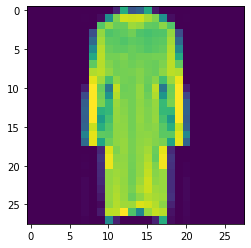

Coat
Shirt


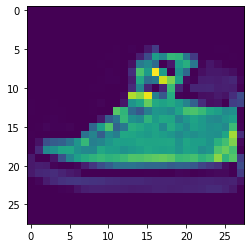

Sneaker
Coat


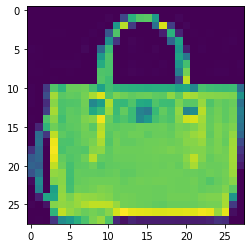

Bag
Pullover


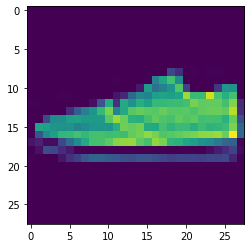

Sneaker
Dress


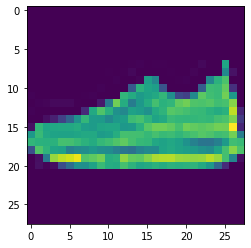

Sneaker
Ankle Boot


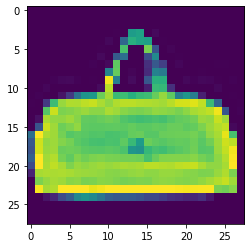

Bag
Shirt


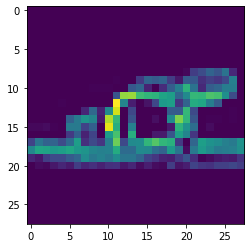

Sandal
Coat


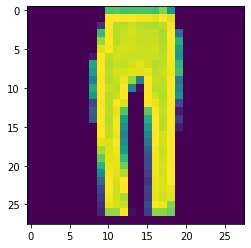

Trouser
Pullover


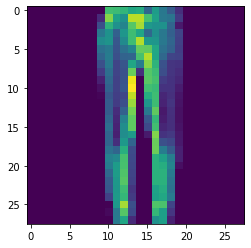

Trouser
Ankle Boot


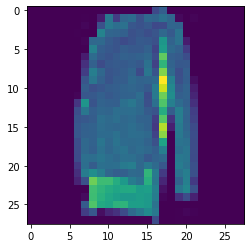

Dress
Shirt


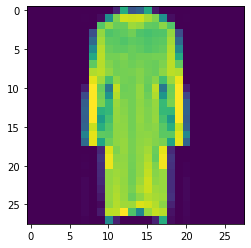

Coat
Coat


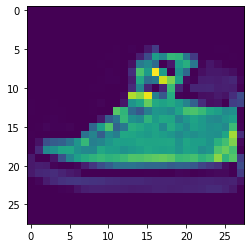

Sneaker
Pullover


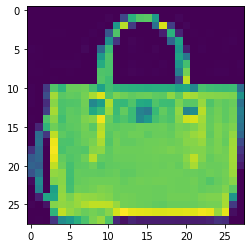

Bag
Shirt


In [185]:
outer_counter = 0
inner_counter = 0

for outer_counter in range(10):
    for inner_counter in range(10):
        plt.imshow(incorr_X[outer_counter][inner_counter].view(28,28))
        plt.show()
        
        a_featureset = incorr_X[outer_counter][inner_counter]
        reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
        output = net(reshaped_for_network) #output will be a list of network predictions.
        first_pred = output[0]
        
        biggest_index = torch.argmax(first_pred)
        print(output_label(biggest_index))
        
        print(output_label(int(incorr_yidx[inner_counter+outer_counter])))

In [186]:
detailer = iter(testset)

In [187]:
images, labels = detailer.next()

In [189]:
output = net(images.view(-1,784))

In [196]:
_, preds = torch.max(output, 1)

In [35]:
# images = images.numpy()

In [198]:
fig = plt.figure(figsize=(25,4))

<Figure size 1800x288 with 0 Axes>

In [36]:
# for idx in np.arange(20):
#     ax = fig.add_subplot(2,20/2,idx+1,xticks=[], yticks=[])
#     ax.imshow(np.squeeze(images[idx]), cmap='gray')
#     ax.set_title("{}, ({})".format(str(pred[idx].item()), str(labels[idx].items())), color=("green" if pred[idx]==labels[idx] else "red"))

In [206]:
len(train)

60000

In [207]:
train.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [208]:
train.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [209]:
sample = next(iter(train))

In [210]:
len(sample)

2

In [212]:
image, label = sample

In [213]:
type(image)

torch.Tensor

In [214]:
type(label)

int

In [215]:
image.shape

torch.Size([1, 28, 28])

In [216]:
torch.tensor(label).shape

torch.Size([])

In [217]:
image.squeeze().shape

torch.Size([28, 28])

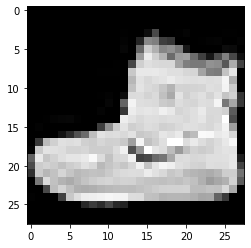

In [218]:
plt.imshow(image.squeeze(), cmap="gray")

In [219]:
output_label(int(torch.tensor(label)))

'Ankle Boot'

Shape: torch.Size([1, 28, 28])
Label: Ankle Boot


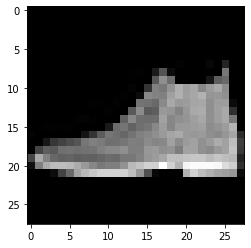

In [223]:
img, label = test[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', output_label(label))

In [224]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [244]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    
#     data = data.view(data.size(0), -1)
    xb = xb.view(data.size(0), -1)

    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [37]:
# img, label = test[0]
# plt.imshow(img[0], cmap='gray')
# print('Label:', label, ', Predicted:', predict_image(img, net))

In [265]:
single_loaded_img = testset.dataset.data[1]
# single_loaded_img = single_loaded_img.to(device)
single_loaded_img = single_loaded_img[None, None]
single_loaded_img = single_loaded_img.type('torch.FloatTensor') # instead of DoubleTensor

single_loaded_img = single_loaded_img.view(1, -1) # converts [3 x 256 x 256] to 1 x 196608

out_predict = net(single_loaded_img)

In [266]:
torch.argmax(out_predict)

tensor(2)

In [278]:
sample = train[3]
image, label = sample 

image.shape 

torch.Size([1, 28, 28])

In [279]:
image.unsqueeze(3).shape

# torch.Size([1, 1, 28, 28])

torch.Size([1, 28, 28, 1])

In [282]:
image = image.view(1, -1) # converts [3 x 256 x 256] to 1 x 196608


pred = net(image.unsqueeze(0)) # image shape needs to be (batch_size × in_channels × H × W)

output_label(int(torch.argmax(pred)))

'Ankle Boot'

Shape: torch.Size([1, 28, 28])
Label: Dress


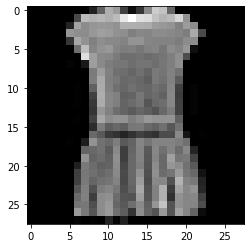

In [283]:
img, label = train[3]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', output_label(label))

In [254]:
## dataloader for validation dataset 
dataiter = iter(testset)
data, labels = dataiter.next()

data = data.view(data.size(0), -1)

output = net(data)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:", labels[:10])
print ("Predicted:", preds[:10])

Actual: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
Predicted: [9 2 1 1 6 1 4 6 5 7]


In [284]:
len(trainset)

6000

--------------------------------------------------------------------------
--- Print image for index:  0   , is label:  Ankle Boot
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  1   , is label:  T-shirt/Top
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  2   , is label:  T-shirt/Top
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  3   , is label:  Dress
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  4   , is label:  T-shirt/Top
-----------------------------------------------

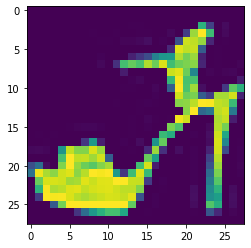

In [287]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

i = 0
while i < 10:
  index_image = i
  i = i + 1
  train_image_x, train_target_x = train[index_image]
  print('--------------------------------------------------------------------------')
  print('--- Print image for index: ', index_image, '  , is label: ', output_label(train_target_x))
  print('--------------------------------------------------------------------------')
  plt.imshow(train_image_x[0])

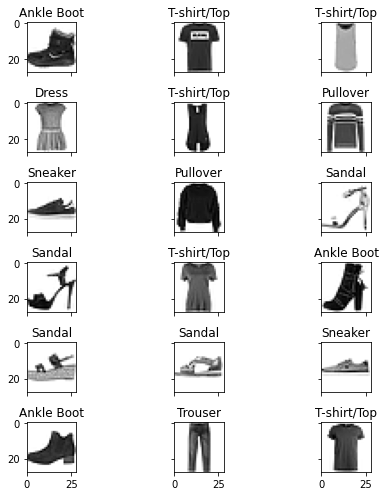

In [290]:
fig, axes = plt.subplots(6,3, 
                         figsize=(7,7),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

# --- Plot Images  - 18 images
i = 0
while i < 18:
  index_image = i

  train_image_x, train_target_x = train[index_image]
  images_to_plot = train_image_x[0]
  
  # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
  subplot_row = i//3    # floor division discards the fractional part
  subplot_col = i%3     # the % operator returns the remainder of the division
  
  # print('i=', i ,'   Row=',subplot_row, '   col=',subplot_col)
  ax = axes[subplot_row, subplot_col]

  # plot image on subplot

  ax.imshow(images_to_plot, cmap='gray_r')
   
  ax.set_title(output_label(train_target_x) )
  ax.set_xbound([0,28])
    
  i = i + 1

plt.tight_layout()
plt.show()

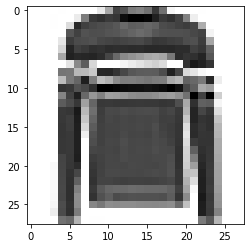

In [292]:
train_image_x, train_target_x = train[5] # index_image
images_to_plot = train_image_x[0]
  
  # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
# subplot_row = i//3    # floor division discards the fractional part
# subplot_col = i%3     # the % operator returns the remainder of the division
  
  # print('i=', i ,'   Row=',subplot_row, '   col=',subplot_col)
# ax = axes[subplot_row, subplot_col]

  # plot image on subplot

plt.imshow(images_to_plot, cmap='gray_r')
   
  
# plt.tight_layout()
plt.show()

In [293]:
print(output_label(train_target_x) )

Pullover


In [295]:
# use the Python variable assignment convention to get the image and integer into two separate Python variables.

index_image = 5        # Test to print image , select your index

train_image_x, train_target_x = train[index_image]

# let's look at the image using PIL show operation.
print('The image in the dataset MNIST at Index: ', index_image, '  , is number: ', output_label(train_target_x))

The image in the dataset MNIST at Index:  5   , is number:  Pullover


--------------------------------------------------------------------------
--- Print image for index:  0   , is number:  9
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  1   , is number:  0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  2   , is number:  0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  3   , is number:  3
--------------------------------------------------------------------------
--------------------------------------------------------------------------
--- Print image for index:  4   , is number:  0
--------------------------------------------------------------------------
----------

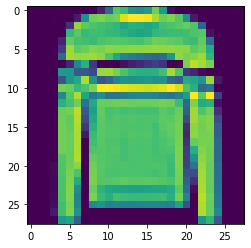

In [300]:
# https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images
# Print images fro MNIST datasets

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

i = 0
while i < 6:
  index_image = i
  i = i + 1
  train_image_x, train_target_x = train[index_image]
  print('--------------------------------------------------------------------------')
  print('--- Print image for index: ', index_image, '  , is number: ', train_target_x)
  print('--------------------------------------------------------------------------')
  plt.imshow(train_image_x[0])

In [38]:
# from torch.autograd import Variable

# results = []

# with torch.no_grad():
#     net.eval()
#     for images in testset:
#         test = Variable(images.view(-1,1,28,28))
#         output = net(test)
#         ps = torch.exp(output)
#         top_p, top_class = ps.topk(1, dim = 1)
#         results += top_class.numpy().tolist()

In [312]:
img = test[0][0] #shape (784,1)

In [313]:
type(img[0])

torch.Tensor

In [315]:
img[0].shape

torch.Size([28, 28])

In [316]:
img = img.reshape(1, 1, 28, 28)

In [39]:
# img  = torch.from_numpy(img).float() #tensor

In [318]:
def prediciton(test_loader, model):
    model.eval()
    test_pred = torch.LongTensor()
    
    for i, data in enumerate(test_loader):
        if torch.cuda.is_available():
            data = data.cuda()
            
        output = model(data)
        
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
        
    return test_pred


In [40]:
# # test_batch_size = 64
# # test_dataset = get_dataset(test_df, transform=val_test_transforms)
# # test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
# #                                           batch_size=test_batch_size, shuffle=False)

# # tensor prediction
# test_pred = prediciton(test[0], net)

# # tensor -> numpy.ndarray -> pandas.DataFrame
# test_pred_df = pd.DataFrame(np.c_[np.arange(1, len(test_dataset)+1), test_pred.numpy()], 
#                       columns=['ImageId', 'Label'])

# # show part of prediction dataframe
# print(test_pred_df.head())

Shape: torch.Size([1, 28, 28])
Label: Ankle Boot


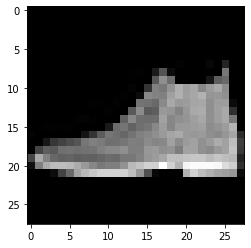

In [325]:
img, label = test[0]

plt.imshow(img[0], cmap='gray')

print('Shape:', img.shape)
print('Label:', output_label(label))

In [326]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [327]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [41]:
# img, label = test[0]
# plt.imshow(img[0], cmap='gray')
# print('Label:', label, ', Predicted:', predict_image(img, net))

In [42]:
# dataiter = iter(testset)
# images, labels = dataiter.next()

# # get sample outputs
# output = net(images)
# # convert output probabilities to predicted class
# _, preds = torch.max(output, 1)
# # prep images for display
# images = images.numpy()

# # plot the images in the batch, along with predicted and true labels
# fig = plt.figure(figsize=(25, 4))
# for idx in np.arange(20):
#     ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#     ax.imshow(np.squeeze(images[idx]), cmap='gray')
#     ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
#                  color=("green" if preds[idx]==labels[idx] else "red"))

In [43]:
# dataiter = iter(testset)
# images,labels = dataiter.next()

# # show images
# imshow(torchvision.utils.make_grid(images))

# #print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

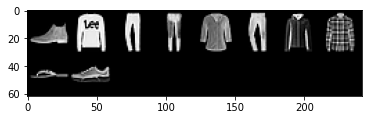

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [341]:
dataiter = iter(testset)
images, labels = dataiter.next()

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(torchvision.utils.make_grid(images))
plt.show()

print(labels)

In [44]:
# imshow(images[0])

# plt.show

In [45]:
# 0: "T-shirt/Top",
#                  1: "Trouser",
#                  2: "Pullover",
#                  3: "Dress",
#                  4: "Coat", 
#                  5: "Sandal", 
#                  6: "Shirt",
#                  7: "Sneaker",
#                  8: "Bag",
#                  9: "Ankle Boot"

In [48]:
# dataiter = iter(testset)
# images, labels = dataiter.next()

# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [49]:
# n_samples_show = 6
# count = 0
# fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

# net.eval()
# with torch.no_grad():
#     for batch_idx, (data, target) in enumerate(testset):
#         if count == n_samples_show:
#             break
#         output = net(data)
        
#         pred = output.argmax(dim=1, keepdim=True) 

#         axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

#         axes[count].set_xticks([])
#         axes[count].set_yticks([])
#         axes[count].set_title('Predicted {}'.format(pred.item()))
        
#         count += 1

In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.865


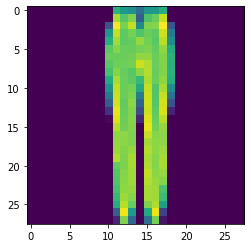

In [21]:
import matplotlib.pyplot as plt

plt.imshow(X[8].view(28,28))
plt.show()

In [22]:
print(output_label(torch.argmax(net(X[8].view(-1,784))[0])))


Trouser


Image number:  0



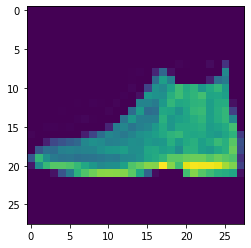

Predicted Label:  Ankle Boot
Actual Label:  Ankle Boot
Image number:  1



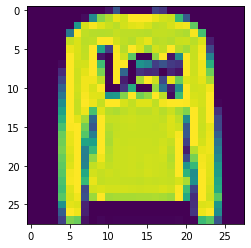

Predicted Label:  Pullover
Actual Label:  Pullover
Image number:  2



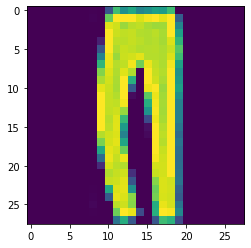

Predicted Label:  Trouser
Actual Label:  Trouser
Image number:  3



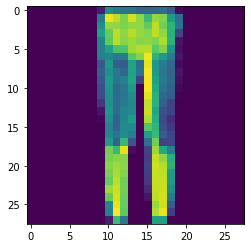

Predicted Label:  Trouser
Actual Label:  Trouser
Image number:  4



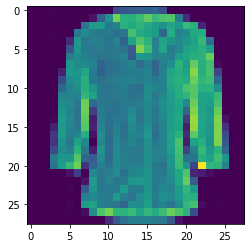

Predicted Label:  Shirt
Actual Label:  Shirt
Image number:  5



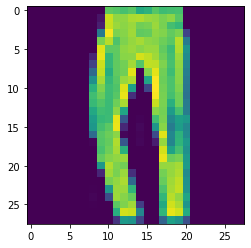

Predicted Label:  Trouser
Actual Label:  Trouser
Image number:  6



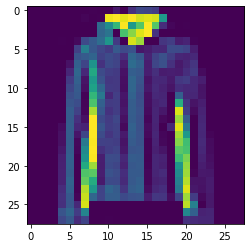

Predicted Label:  Coat
Actual Label:  Coat
Image number:  7



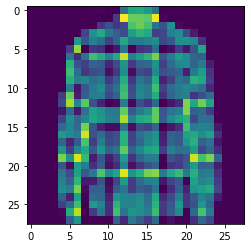

Predicted Label:  Shirt
Actual Label:  Shirt
Image number:  8



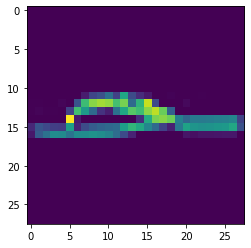

Predicted Label:  Sandal
Actual Label:  Sandal
Image number:  9



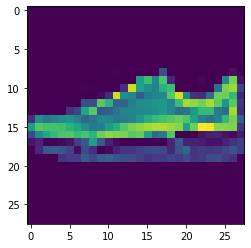

Predicted Label:  Sneaker
Actual Label:  Sneaker
Image number:  10



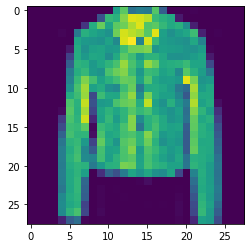

Predicted Label:  Coat
Actual Label:  Coat
Image number:  11



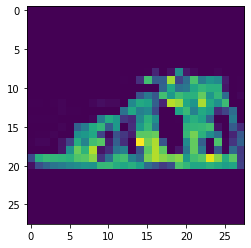

Predicted Label:  Sandal
Actual Label:  Sandal
Image number:  12



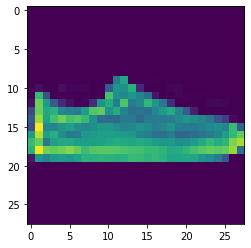

Predicted Label:  Sandal
Actual Label:  Sneaker
Image number:  13



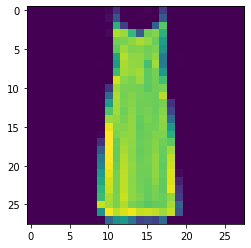

Predicted Label:  Dress
Actual Label:  Dress
Image number:  14



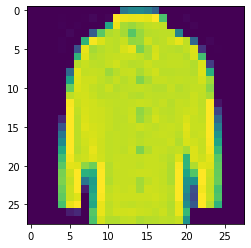

Predicted Label:  Coat
Actual Label:  Coat
Image number:  15



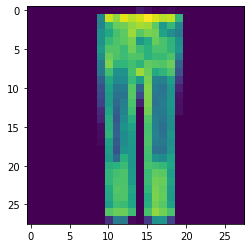

Predicted Label:  Trouser
Actual Label:  Trouser
Image number:  16



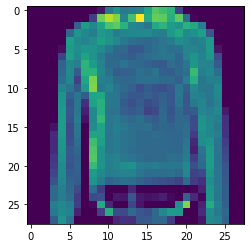

Predicted Label:  Pullover
Actual Label:  Pullover
Image number:  17



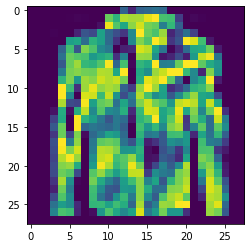

Predicted Label:  Pullover
Actual Label:  Coat
Image number:  18



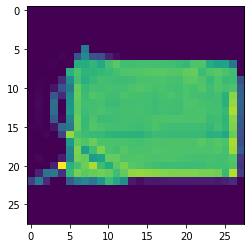

Predicted Label:  Bag
Actual Label:  Bag
Image number:  19



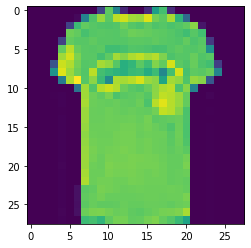

Predicted Label:  T-shirt/Top
Actual Label:  T-shirt/Top


In [31]:
breaker = 0
img_counter = 1

with torch.no_grad():
    for data in testset:
        X, y = data
        
        for i in range(len(X)):
            
            print()
            print('Image number: ', img_counter)
#             print()
            
            img_counter = img_counter + 1
            
            plt.imshow(X[i].view(28,28))
            plt.show()
            
            predicted_label = output_label(torch.argmax(net(X[i].view(-1,784))[0]))
            
            actual_label = output_label(y[i])
            
            print('Predicted Label: ', predicted_label)
            
            print('Actual Label: ', actual_label)
        
        breaker = breaker+1
        
        if (breaker == 2):
            break

            


Image number:  1


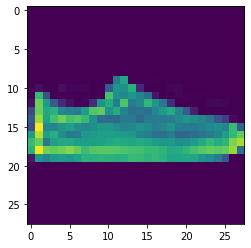

Predicted Label:  Sandal
Actual Label:  Sneaker

Image number:  2


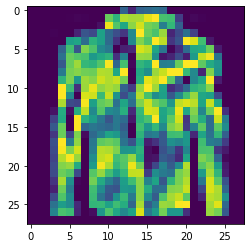

Predicted Label:  Pullover
Actual Label:  Coat

Image number:  3


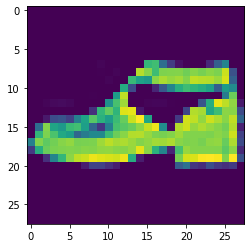

Predicted Label:  Sandal
Actual Label:  Ankle Boot

Image number:  4


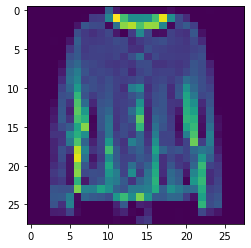

Predicted Label:  Pullover
Actual Label:  Coat

Image number:  5


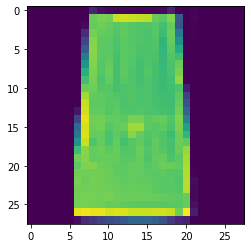

Predicted Label:  T-shirt/Top
Actual Label:  Dress

Image number:  6


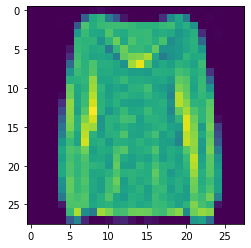

Predicted Label:  Shirt
Actual Label:  Pullover

Image number:  7


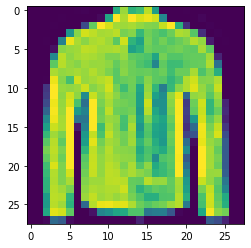

Predicted Label:  Shirt
Actual Label:  Coat

Image number:  8


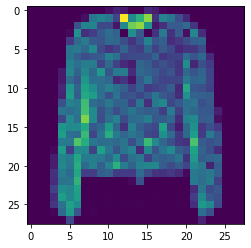

Predicted Label:  Pullover
Actual Label:  Coat

Image number:  9


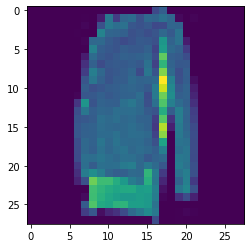

Predicted Label:  Dress
Actual Label:  Pullover

Image number:  10


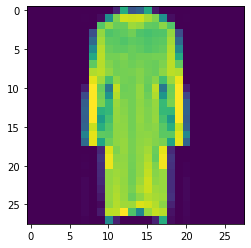

Predicted Label:  Coat
Actual Label:  Dress

Image number:  11


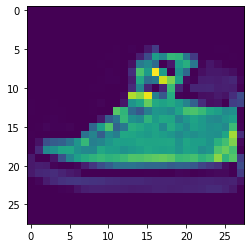

Predicted Label:  Sneaker
Actual Label:  Ankle Boot

Image number:  12


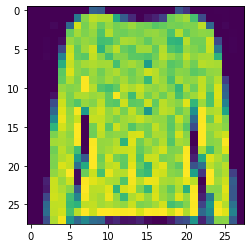

Predicted Label:  Pullover
Actual Label:  Shirt

Image number:  13


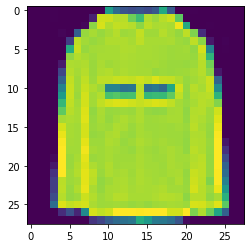

Predicted Label:  Pullover
Actual Label:  Coat

Image number:  14


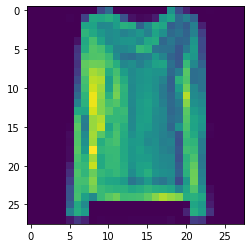

Predicted Label:  Shirt
Actual Label:  Pullover

Image number:  15


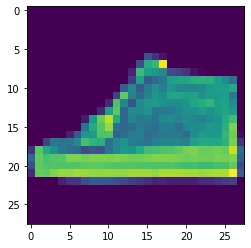

Predicted Label:  Sneaker
Actual Label:  Ankle Boot

Image number:  16


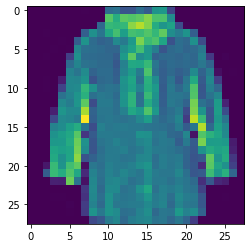

Predicted Label:  Coat
Actual Label:  Shirt

Image number:  17


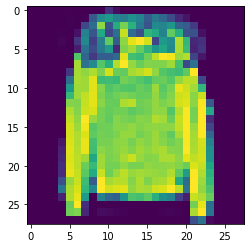

Predicted Label:  Pullover
Actual Label:  Coat

Image number:  18


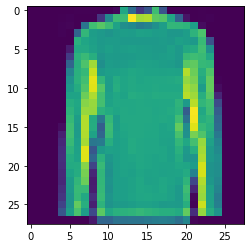

Predicted Label:  Shirt
Actual Label:  Pullover

Image number:  19


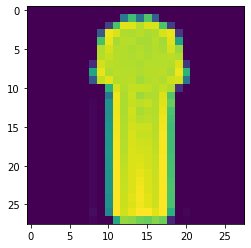

Predicted Label:  Dress
Actual Label:  Shirt


In [32]:
breaker = 0
img_counter = 1

with torch.no_grad():
    for data in testset:
        X, y = data
        
        for i in range(len(X)):
            
            predicted_label = output_label(torch.argmax(net(X[i].view(-1,784))[0]))
            
            actual_label = output_label(y[i])
            
            if (predicted_label != actual_label):
                print()
                print('Image number: ', img_counter)
    #             print()

                img_counter = img_counter + 1

                plt.imshow(X[i].view(28,28))
                plt.show()



                print('Predicted Label: ', predicted_label)

                print('Actual Label: ', actual_label)

        breaker = breaker+1
        
        if (img_counter == 20):
            break

            